<a href="https://colab.research.google.com/github/mj-creatives/EDA-With-Python-and-Pandas-Supermarket/blob/main/EDA_With_Python_and_Pandas_Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sure, I can help you with that. Here are the steps on how to analyze the supermarket sales dataset using Python:

1. Import the necessary libraries.

In [1]:
!pip install --upgrade pip

!pip install --upgrade Pillow

In [2]:
!pip install calmap
!pip install ydata_profiling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

Data Dictionary

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in USD

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

2. Load the dataset.

In [4]:
df = pd.read_csv('sample_data/supermarket_sales.csv')

3. Convert the `Date` column to datetime format.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

4. Set the `Date` column as the index.

In [7]:
df = df.set_index('Date')

5. Use seaborn to show the distribution of customer ratings.

<ipython-input-8-3badbc3efdf4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


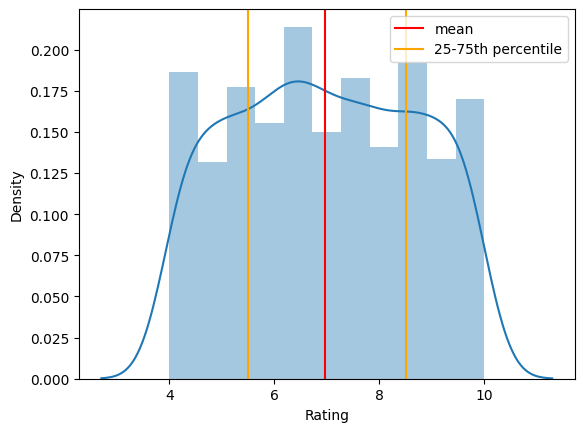

In [8]:
sns.distplot(df['Rating'])
plt.axvline(df['Rating'].mean(), color='red',label='mean')
plt.axvline(df['Rating'].quantile(0.25), color='orange',label='25-75th percentile')
plt.axvline(df['Rating'].quantile(0.75), color='orange')
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

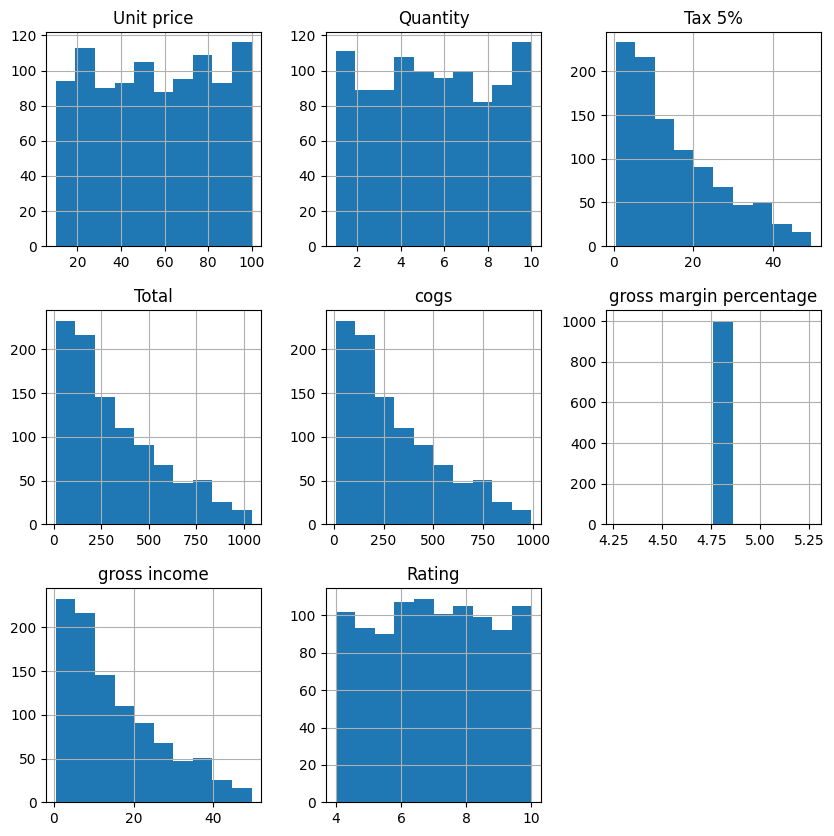

In [9]:
df.hist(figsize=(10,10))

Question 2: Do aggregate sales numbers differ by much between branches?

<Axes: xlabel='Branch', ylabel='count'>

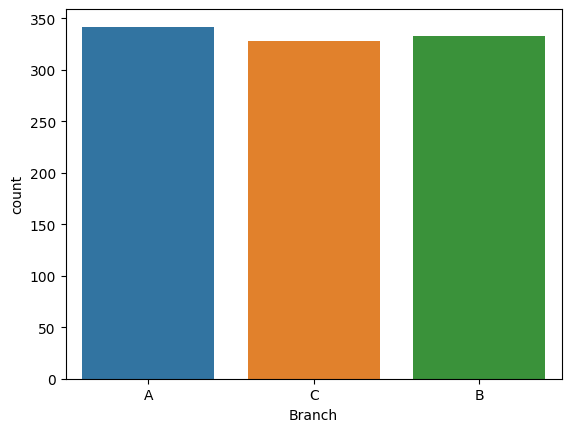

In [10]:
sns.countplot(x=df['Branch'])

In [11]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

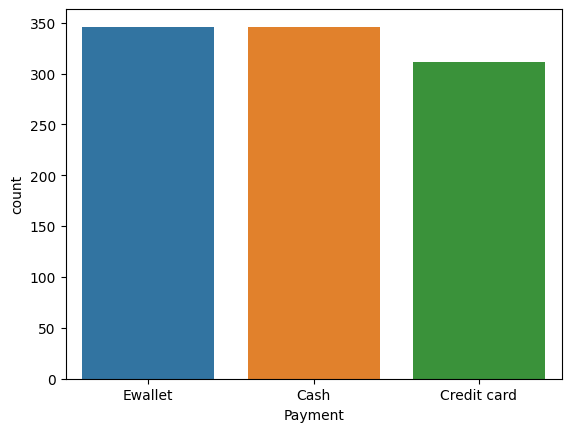

In [12]:
sns.countplot(x=df['Payment'])

7. Use seaborn regplot to demonstrate the relationship between gross income and customer ratings.

<Axes: xlabel='Rating', ylabel='gross income'>

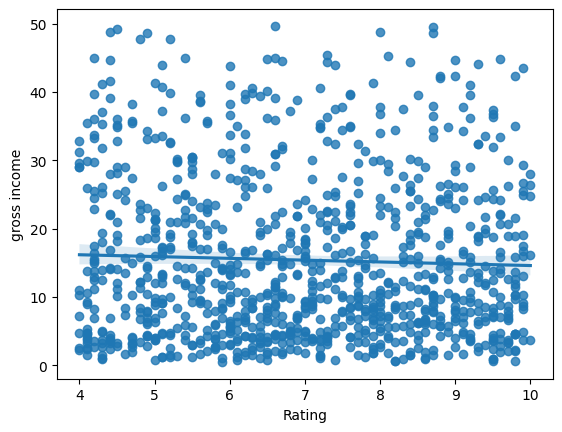

In [13]:
sns.regplot(x='Rating', y='gross income', data=df)

<Axes: xlabel='Branch', ylabel='gross income'>

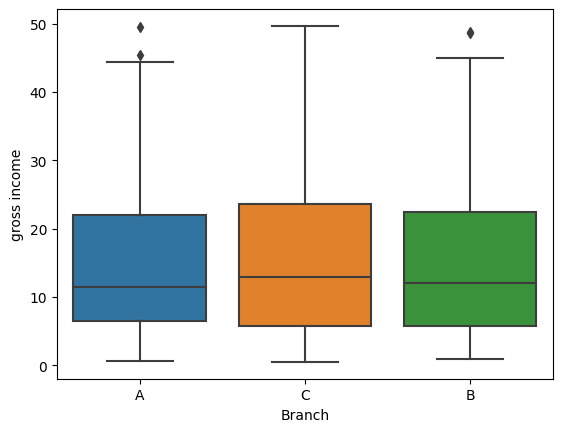

In [14]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

<Axes: xlabel='Gender', ylabel='gross income'>

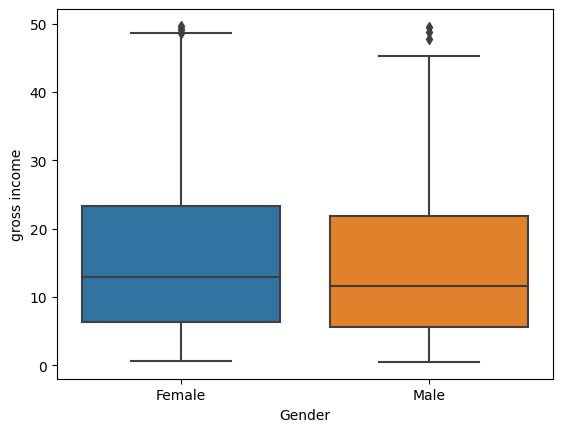

In [15]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

8. Group the data by the `Date` column and then run the `.mean()` operation.

In [16]:
df_grouped = df.groupby('Date').mean()
df_grouped

<ipython-input-16-9207ca049552>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('Date').mean()


Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

<Axes: xlabel='Date', ylabel='gross income'>

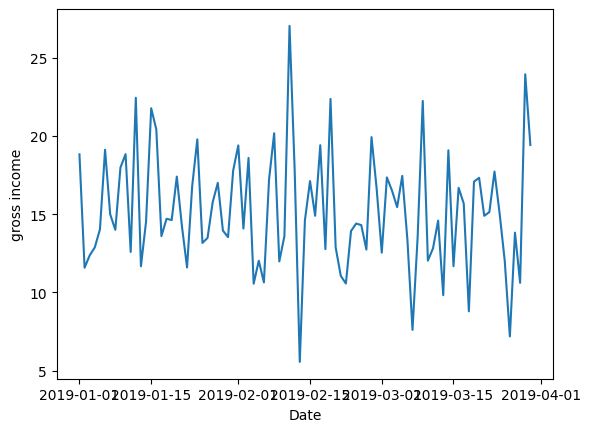

In [17]:
sns.lineplot(x=df_grouped.index,
             y=df_grouped['gross income'])

Clean duplicated rows and missing values

In [18]:
df.duplicated().sum()

3

In [19]:
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: ylabel='Date'>

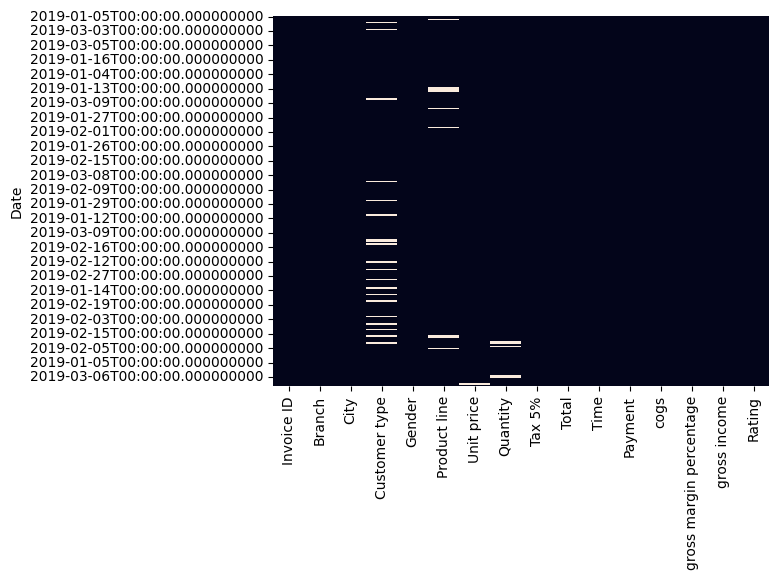

In [22]:
sns.heatmap(df.isnull(),cbar=False)

In [23]:
df.fillna(df.mean(),inplace=True)

<ipython-input-23-faa1320c28a3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [24]:
df.fillna(df.mode().iloc[0],inplace=True)

In [25]:
dataset = pd.read_csv('sample_data/supermarket_sales.csv')
profile = ProfileReport(dataset, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Correlation Analysis

In [26]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [27]:
np.round(df.corr(),2)

<ipython-input-27-d296eb131342>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(),2)


Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<ipython-input-30-8656c6096e04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2),annot=True)


<Axes: >

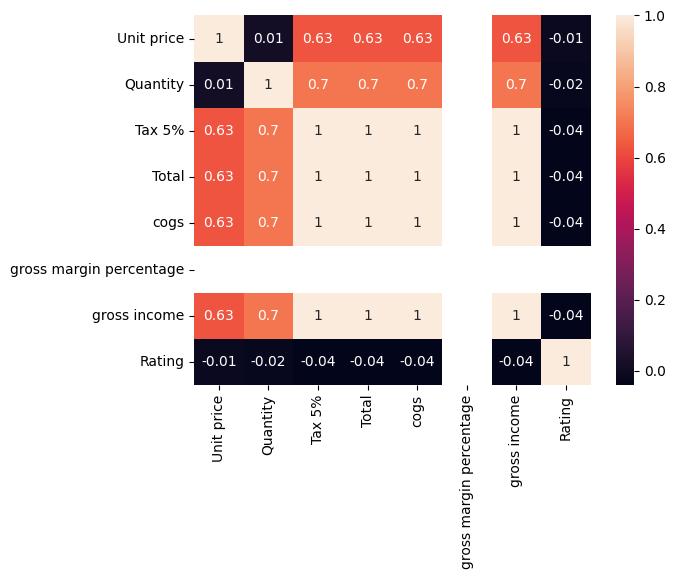

In [30]:
sns.heatmap(np.round(df.corr(),2),annot=True)

This will produce a DataFrame with the mean values for each day for all of the columns in the dataset.

You can now use this DataFrame to explore the data further. For example, you could use it to see how customer ratings or gross income have changed over time.

Here are some additional things you can do with the supermarket sales dataset:

* Analyze the relationship between different features, such as customer ratings, gross income, and product type.
* Look for patterns in the data, such as the days of the week when sales are highest or the products that are most popular.
* Use the data to make predictions about future sales.

I hope this helps!

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/erwindrarusli/machine-learning-linear-regression">https://github.com/erwindrarusli/machine-learning-linear-regression</a></li>
  </ol>
</div>